In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
%matplotlib inline

In [7]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/input_files/wavefront/point')))
band = 'L'
cube_duration = 3600    # s
cube_samp = 0.3         # s
lat = -24.59            # deg
dec = -5                # deg
ang_sep = 100           # mas

### Parallactic angle

min = 160.54°, max = 199.46°


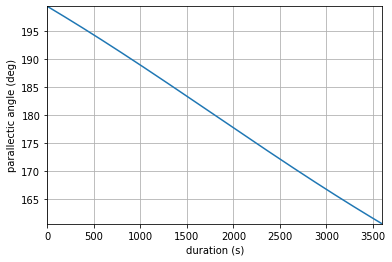

In [8]:
# hour angles
ha = cube_duration/3600/24*360
# angles in rad
ncube = int(cube_duration/cube_samp)
hr = np.deg2rad(np.linspace(-ha/2, ha/2, ncube))
dr = np.deg2rad(dec)
lr = np.deg2rad(lat)
# parallactic angle in deg
pa = -np.rad2deg(np.arctan2(-np.sin(hr), np.cos(dr)*np.tan(lr)
     - np.sin(dr)*np.cos(hr)))
pa = (pa + 360)%360 
pa_rad = np.deg2rad(pa)
plt.plot(np.arange(ncube)*cube_samp, pa)
plt.xlim(0,cube_duration)
plt.ylim(min(pa),max(pa))
plt.xlabel('duration (s)')
plt.ylabel('parallectic angle (deg)')
plt.grid(True)
print('min = %.2f°, max = %.2f°'%(min(pa), max(pa)))

### Tip-tilt

In [4]:
xy = np.array([ang_sep*np.cos(pa_rad), ang_sep*np.sin(pa_rad)]).T
fits.writeto('point_planet_%ss_%sms_%s.fits'%(cube_duration, 
        int(cube_samp*1e3), band), np.float32(xy))

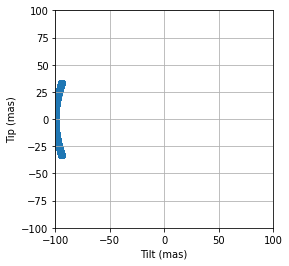

In [5]:
plt.scatter(xy[:,0], xy[:,1])
plt.axis('square')
xy_max = np.ceil(np.max(abs(xy)))
plt.xlim(-xy_max, xy_max)
plt.ylim(-xy_max, xy_max)
plt.xlabel('Tilt (mas)')
plt.ylabel('Tip (mas)')
plt.grid(True);